Label Propagation learning a complex structure

We generate a dataset with two concentric circles. In addition, a label is associated with each sample of the dataset that is: 0 (belonging to the outer circle), 1 (belonging to the inner circle), and -1 (unknown). Here, all labels but two are tagged as unknown.

In [2]:
import numpy as np
from sklearn.datasets import make_circles

n_samples = 200
X, y = make_circles(n_samples=n_samples, shuffle=False)
outer, inner = 0, 1
labels = np.full(n_samples, -1.0)
labels[0] = outer
labels[-1] = inner

In [6]:
X[150:170]

array([[-8.00000000e-01, -2.57299624e-16],
       [-7.98421383e-01, -5.02324156e-02],
       [-7.93691761e-01, -1.00266587e-01],
       [-7.85829801e-01, -1.49905052e-01],
       [-7.74866529e-01, -1.98951910e-01],
       [-7.60845213e-01, -2.47213595e-01],
       [-7.43821189e-01, -2.94499642e-01],
       [-7.23861642e-01, -3.40623433e-01],
       [-7.01045344e-01, -3.85402939e-01],
       [-6.75462340e-01, -4.28661436e-01],
       [-6.47213595e-01, -4.70228202e-01],
       [-6.16410594e-01, -5.09939192e-01],
       [-5.83174902e-01, -5.47637685e-01],
       [-5.47637685e-01, -5.83174902e-01],
       [-5.09939192e-01, -6.16410594e-01],
       [-4.70228202e-01, -6.47213595e-01],
       [-4.28661436e-01, -6.75462340e-01],
       [-3.85402939e-01, -7.01045344e-01],
       [-3.40623433e-01, -7.23861642e-01],
       [-2.94499642e-01, -7.43821189e-01]])

In [7]:
y[150:170]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Plot raw data

Text(0.5, 1.0, 'Raw data (2 classes=outer and inner)')

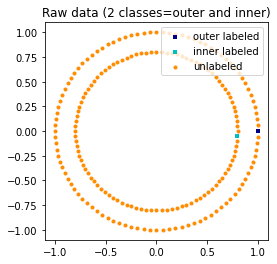

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
plt.scatter(
    X[labels == outer, 0],
    X[labels == outer, 1],
    color="navy",
    marker="s",
    lw=0,
    label="outer labeled",
    s=10,
)
plt.scatter(
    X[labels == inner, 0],
    X[labels == inner, 1],
    color="c",
    marker="s",
    lw=0,
    label="inner labeled",
    s=10,
)
plt.scatter(
    X[labels == -1, 0],
    X[labels == -1, 1],
    color="darkorange",
    marker=".",
    label="unlabeled",
)
plt.legend(scatterpoints=1, shadow=False, loc="upper right")
plt.title("Raw data (2 classes=outer and inner)")

In [9]:
from sklearn.semi_supervised import LabelSpreading

label_spread = LabelSpreading(kernel="knn", alpha=0.8)
label_spread.fit(X, labels)

LabelSpreading(alpha=0.8, kernel='knn')

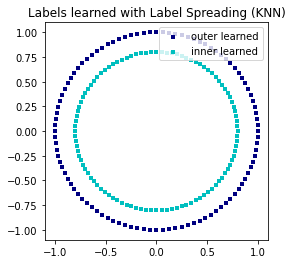

In [10]:
output_labels = label_spread.transduction_
output_label_array = np.asarray(output_labels)
outer_numbers = np.where(output_label_array == outer)[0]
inner_numbers = np.where(output_label_array == inner)[0]

plt.figure(figsize=(4, 4))
plt.scatter(
    X[outer_numbers, 0],
    X[outer_numbers, 1],
    color="navy",
    marker="s",
    lw=0,
    s=10,
    label="outer learned",
)
plt.scatter(
    X[inner_numbers, 0],
    X[inner_numbers, 1],
    color="c",
    marker="s",
    lw=0,
    s=10,
    label="inner learned",
)
plt.legend(scatterpoints=1, shadow=False, loc="upper right")
plt.title("Labels learned with Label Spreading (KNN)")
plt.show()